In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir('E:\personal project\ComputerVision')

### Template Matching

In [11]:
# Template Matching-1D normalized correlation method
def find_template_1D(t,s):
    c=cv2.matchTemplate(t,s,cv2.TM_CCORR_NORMED)
    print(c)
    min_val, max_val, min_loc, max_loc=cv2.minMaxLoc(c)
    return max_loc

s=np.array([1,0,1,1,1,0,0,1,1,0,1,0,1,1,0]).astype(np.uint8)
t=np.array([0,1,1,1]).astype(np.uint8)

print('The template starts at index: ',find_template_1D(t,s))

[[0.6666667 ]
 [1.        ]
 [0.6666667 ]
 [0.4082483 ]
 [0.40824828]
 [0.8164966 ]
 [0.8164966 ]
 [0.6666667 ]
 [0.40824828]
 [0.8164966 ]
 [0.6666667 ]
 [0.8164967 ]]
The template starts at index:  (0, 1)


In [4]:
img=cv2.imread('2016-07-29 151133.jpg')
img.shape

(2048, 2048, 3)

In [5]:
temp1=img[1850:2035,1670:1860]
temp1.shape

(185, 190, 3)

In [6]:
w,h=temp1.shape[:2]

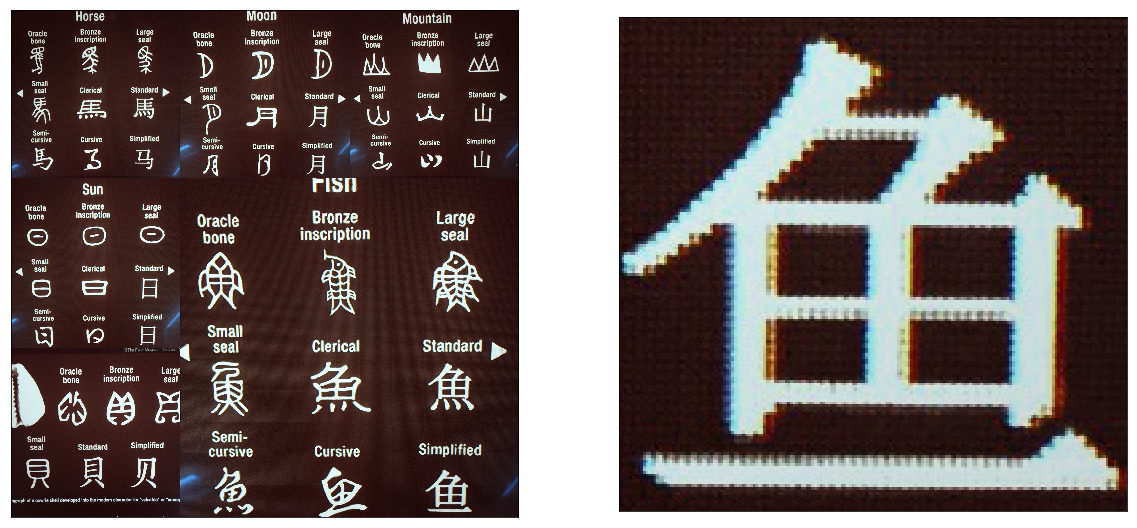

In [7]:
# show the image
#use cv2 package
cv2.imshow('whole_image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imshow('template',temp1)
cv2.waitKey(0)
cv2.destroyAllWindows()

#use plt
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(temp1),plt.xticks([]), plt.yticks([])
plt.show()

In [8]:
# Template Matching-2D normalized correlation method
def find_template_2D(t,s):
    res=cv2.matchTemplate(t,s,cv2.TM_CCORR_NORMED)
    
    min_val, max_val, min_loc, max_loc=cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0]+w, top_left[1]+h)
    
    return res,top_left,bottom_right

In [9]:
res,top_left,bottom_right=find_template_2D(temp1,img)

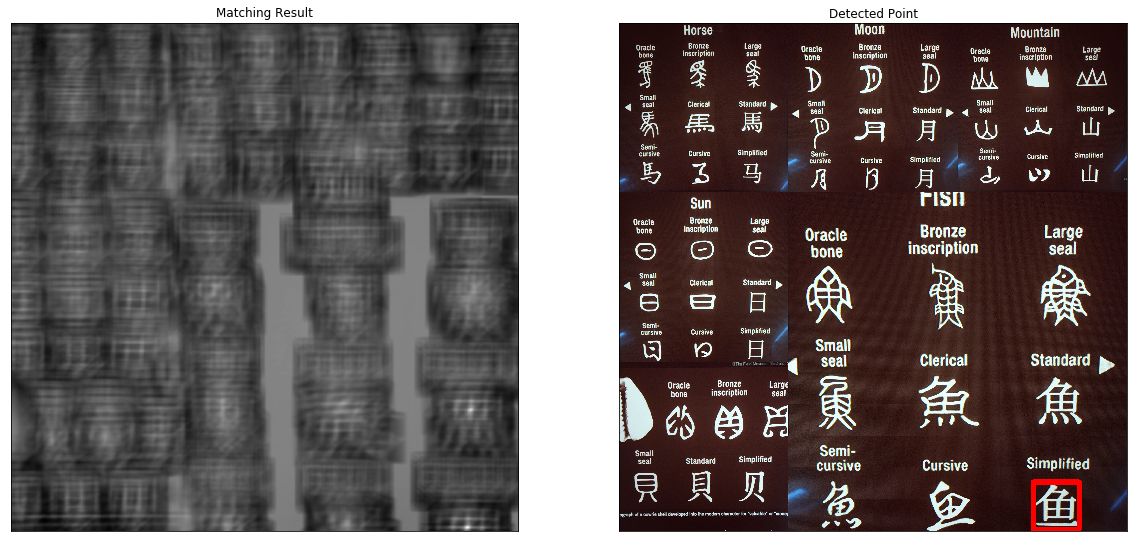

In [10]:
plt.figure(figsize=(20,20))
cv2.rectangle(img,top_left, bottom_right, 255,20)
plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

#### Normalized correlation does help in matching under lighting variations, slight changes in appearance and partial occlusion.